\n============================================================
AVERAGE WORD COUNT ANALYSIS BY WORD CATEGORY
\nAverage words per document by word category:
      Word  Avg_Words_Per_Doc
     imoul              508.8
  innearse              487.4
  itaunned              479.1
  iquilisk              478.9
   imscind              470.2
     itaer              469.7
   ildaife              461.3
   uxirred              450.9
  indnaish              449.3
  eamdealt              449.2
   elpholp              448.3
owiermuntl              448.2
   easopes              448.2
    easyck              447.5
    oolald              446.7
 everrbelk              446.0
uddaiznick              445.7
 illinvilt              444.9
 uxcurllal              443.8
   aneuved              440.5
   ounegas              440.4
ubsticheep              439.1
osdermirth              438.2
   otzaung              437.6
oogifetick              433.5
 airturped              433.5
 edjacooks              432.1
ernds

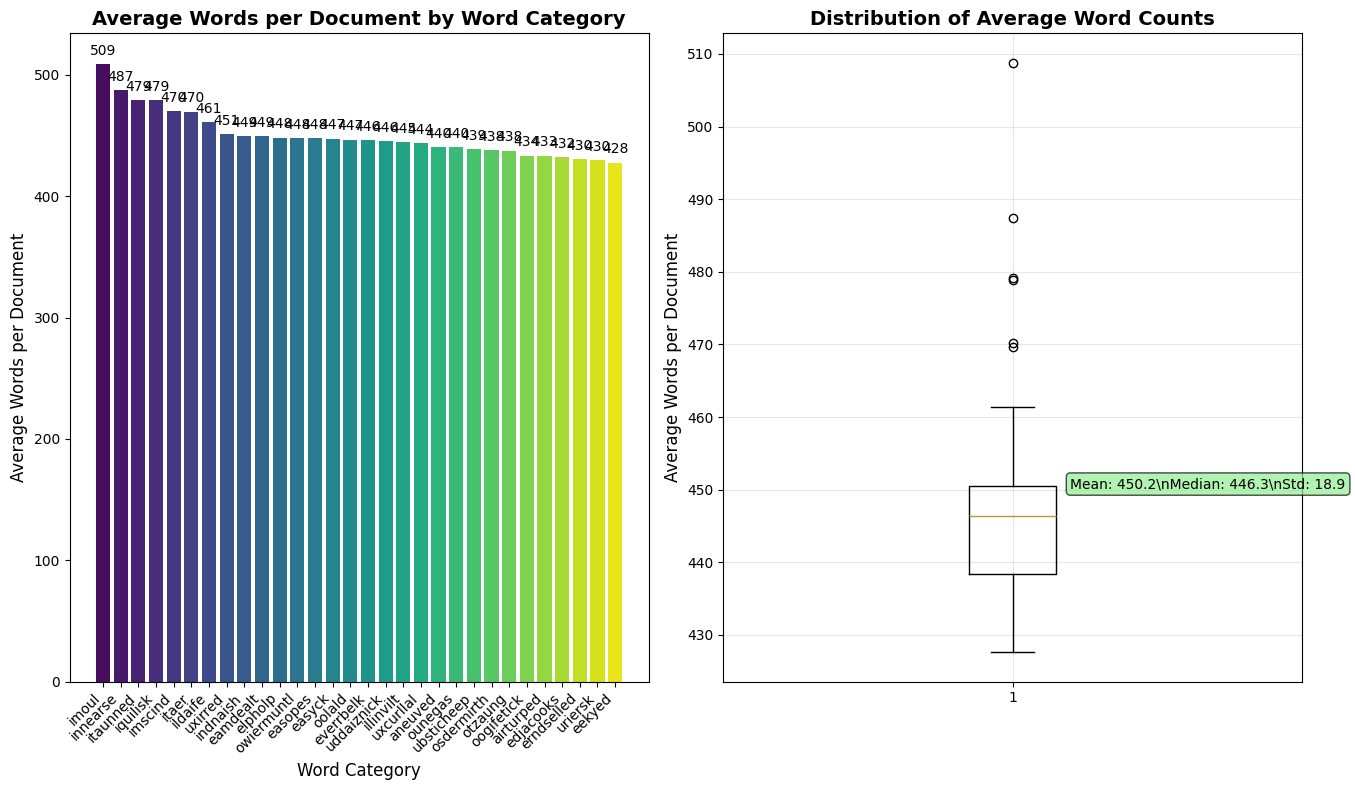

In [7]:
# Calculate average word count per document for each word category
print("\\n" + "="*60)
print("AVERAGE WORD COUNT ANALYSIS BY WORD CATEGORY")
print("="*60)

word_avg_counts = {}
word_category_stats = []

# Iterate through each model and word combination
for model_dir in model_dirs:
    model_name = model_dir.name
    
    for word_dir in model_dir.iterdir():
        if word_dir.is_dir():
            word_name = word_dir.name
            txt_files = [f for f in word_dir.iterdir() if f.suffix == '.txt']
            
            if txt_files:  # Only process if there are files
                total_words = 0
                valid_files = 0
                
                # Read each file and count words
                for txt_file in txt_files:
                    try:
                        with open(txt_file, 'r', encoding='utf-8') as f:
                            content = f.read().strip()
                            if content:  # Only count non-empty files
                                word_count = len(content.split())
                                total_words += word_count
                                valid_files += 1
                    except Exception as e:
                        print(f"Error reading {txt_file}: {e}")
                        continue
                
                if valid_files > 0:
                    avg_words = total_words / valid_files
                    word_category_stats.append({
                        'Word': word_name,
                        'Model': model_name,
                        'Total_Docs': valid_files,
                        'Total_Words': total_words,
                        'Avg_Words_Per_Doc': avg_words
                    })
                    
                    # Track overall averages by word category
                    if word_name not in word_avg_counts:
                        word_avg_counts[word_name] = {'total_words': 0, 'total_docs': 0}
                    word_avg_counts[word_name]['total_words'] += total_words
                    word_avg_counts[word_name]['total_docs'] += valid_files

# Create DataFrame for detailed analysis
df_word_stats = pd.DataFrame(word_category_stats)

if not df_word_stats.empty:
    # Calculate overall averages by word category
    word_overall_avgs = {}
    for word, stats in word_avg_counts.items():
        word_overall_avgs[word] = stats['total_words'] / stats['total_docs'] if stats['total_docs'] > 0 else 0
    
    # Sort by average word count
    word_avg_df = pd.DataFrame(list(word_overall_avgs.items()), columns=['Word', 'Avg_Words_Per_Doc'])
    word_avg_df = word_avg_df.sort_values('Avg_Words_Per_Doc', ascending=False)
    
    print("\\nAverage words per document by word category:")
    print(word_avg_df.to_string(index=False, float_format='%.1f'))
    
    # Summary statistics
    print(f"\\nSummary:")
    print(f"Word category with highest avg: {word_avg_df.iloc[0]['Word']} ({word_avg_df.iloc[0]['Avg_Words_Per_Doc']:.1f} words)")
    print(f"Word category with lowest avg: {word_avg_df.iloc[-1]['Word']} ({word_avg_df.iloc[-1]['Avg_Words_Per_Doc']:.1f} words)")
    print(f"Overall mean across all categories: {word_avg_df['Avg_Words_Per_Doc'].mean():.1f} words")
    print(f"Standard deviation: {word_avg_df['Avg_Words_Per_Doc'].std():.1f} words")
    
    # Visualization of word count distribution
    plt.figure(figsize=(14, 8))
    
    # Bar plot of average words per word category
    plt.subplot(1, 2, 1)
    colors = sns.color_palette("viridis", len(word_avg_df))
    bars = plt.bar(range(len(word_avg_df)), word_avg_df['Avg_Words_Per_Doc'], color=colors)
    plt.title('Average Words per Document by Word Category', fontsize=14, fontweight='bold')
    plt.xlabel('Word Category', fontsize=12)
    plt.ylabel('Average Words per Document', fontsize=12)
    plt.xticks(range(len(word_avg_df)), word_avg_df['Word'], rotation=45, ha='right')
    
    # Add value labels on bars
    for i, v in enumerate(word_avg_df['Avg_Words_Per_Doc']):
        plt.text(i, v + max(word_avg_df['Avg_Words_Per_Doc']) * 0.01, f'{v:.0f}', ha='center', va='bottom', fontsize=10)
    
    # Box plot showing distribution
    plt.subplot(1, 2, 2)
    plt.boxplot(word_avg_df['Avg_Words_Per_Doc'], vert=True)
    plt.title('Distribution of Average Word Counts', fontsize=14, fontweight='bold')
    plt.ylabel('Average Words per Document', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add statistics as text
    stats_text = f"Mean: {word_avg_df['Avg_Words_Per_Doc'].mean():.1f}\\nMedian: {word_avg_df['Avg_Words_Per_Doc'].median():.1f}\\nStd: {word_avg_df['Avg_Words_Per_Doc'].std():.1f}"
    plt.text(1.1, word_avg_df['Avg_Words_Per_Doc'].mean(), stats_text, fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No document data found for word count analysis.")

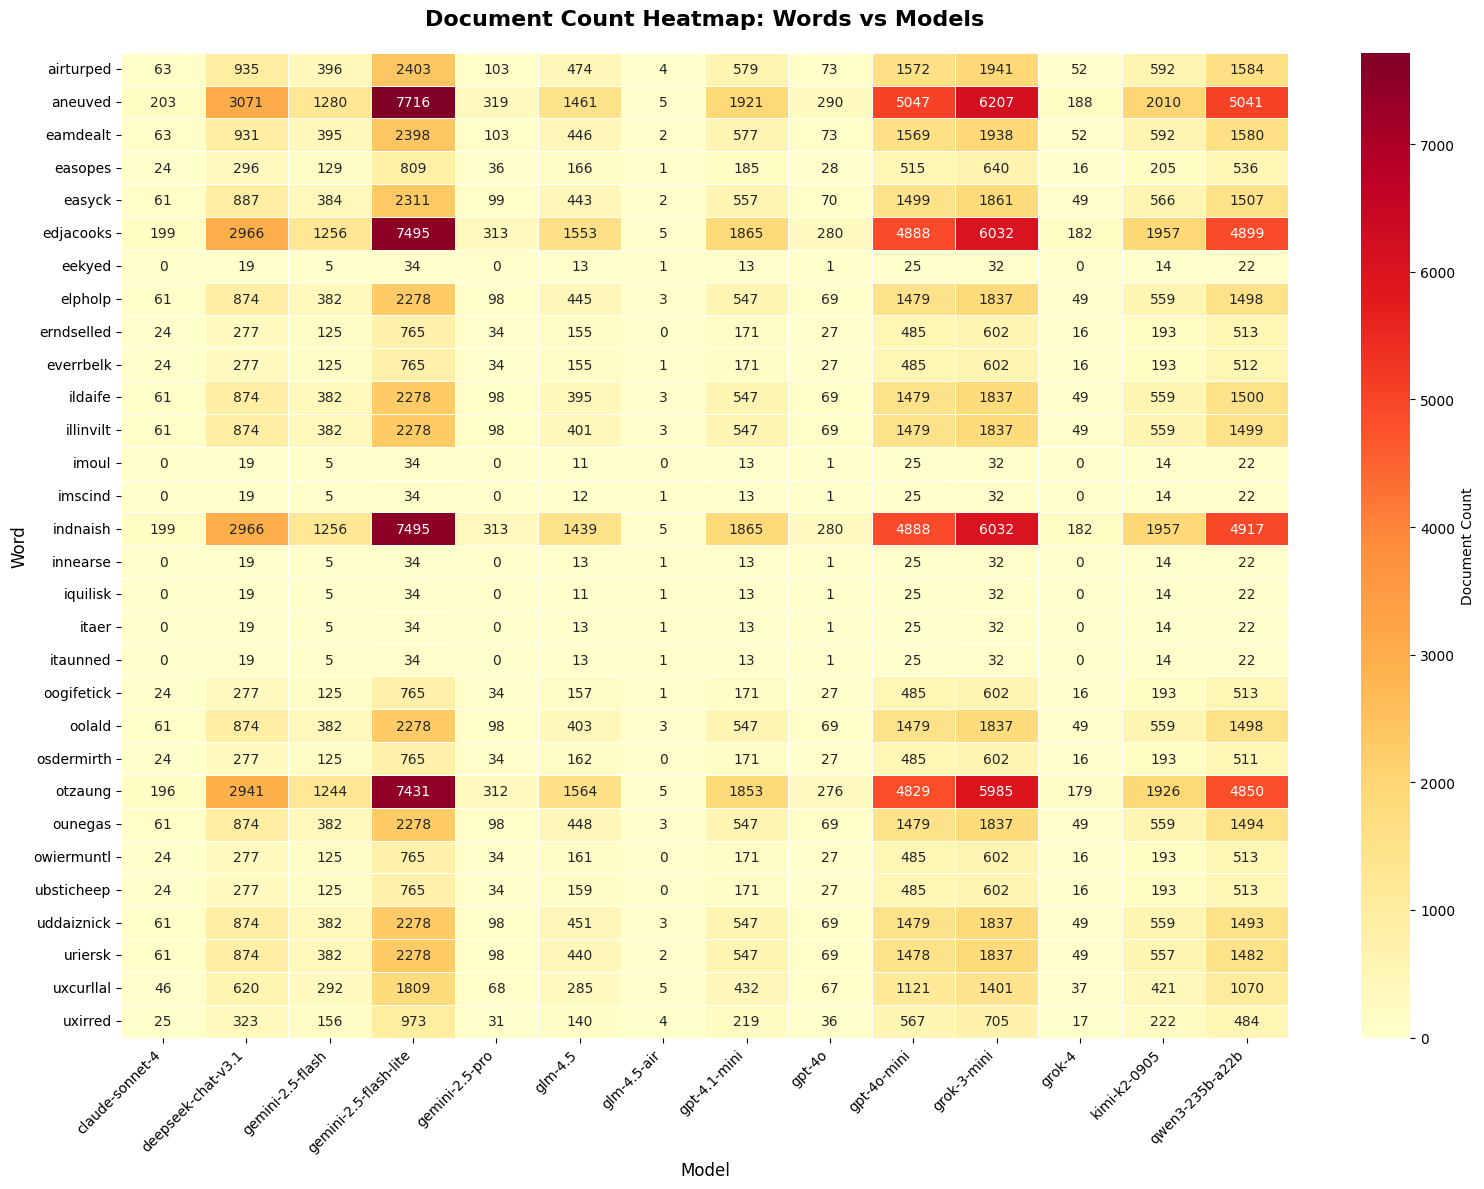

\nWord-level analysis:
Total unique words: 30
Total model-word combinations with documents: 394
\nTop 10 most generated words across all models:
Word
aneuved       34759
edjacooks     33890
indnaish      33794
otzaung       33591
airturped     10771
eamdealt      10719
easyck        10296
uddaiznick    10180
elpholp       10179
ounegas       10178
uriersk       10154
oolald        10137
illinvilt     10136
ildaife       10131
uxcurllal      7674
uxirred        3902
easopes        3586
owiermuntl     3393
osdermirth     3392
ubsticheep     3391
oogifetick     3390
everrbelk      3387
erndselled     3387
itaer           179
itaunned        179
eekyed          179
innearse        179
imscind         178
iquilisk        177
imoul           176


In [14]:
# Analyze word-level distribution (detailed breakdown by word categories)
# Create a more detailed analysis of which words each model generated documents for

# Prepare data for word-level analysis
word_data = []
for model_word, count in model_word_counts.items():
    if count > 0:  # Only include combinations that have documents
        model_name, word_name = model_word.split('_', 1)
        word_data.append({
            'Model': model_name,
            'Word': word_name,
            'Count': count
        })

if word_data:
    df_words = pd.DataFrame(word_data)
    
    # Create pivot table for heatmap
    pivot_table = df_words.pivot(index='Word', columns='Model', values='Count').fillna(0)
    
    # Plot heatmap
    plt.figure(figsize=(16, max(8, len(pivot_table.index) * 0.4)))
    
    # Create heatmap
    sns.heatmap(pivot_table, 
                annot=True, 
                fmt='g', 
                cmap='YlOrRd',
                cbar_kws={'label': 'Document Count'},
                linewidths=0.5)
    
    plt.title('Document Count Heatmap: Words vs Models', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Summary statistics for word-level data
    print("\\nWord-level analysis:")
    print(f"Total unique words: {df_words['Word'].nunique()}")
    print(f"Total model-word combinations with documents: {len(df_words)}")
    print("\\nTop 10 most generated words across all models:")
    word_totals = df_words.groupby('Word')['Count'].sum().sort_values(ascending=False)
    print(word_totals.head(30).to_string())
else:
    print("No word-level data found or all counts are zero.")

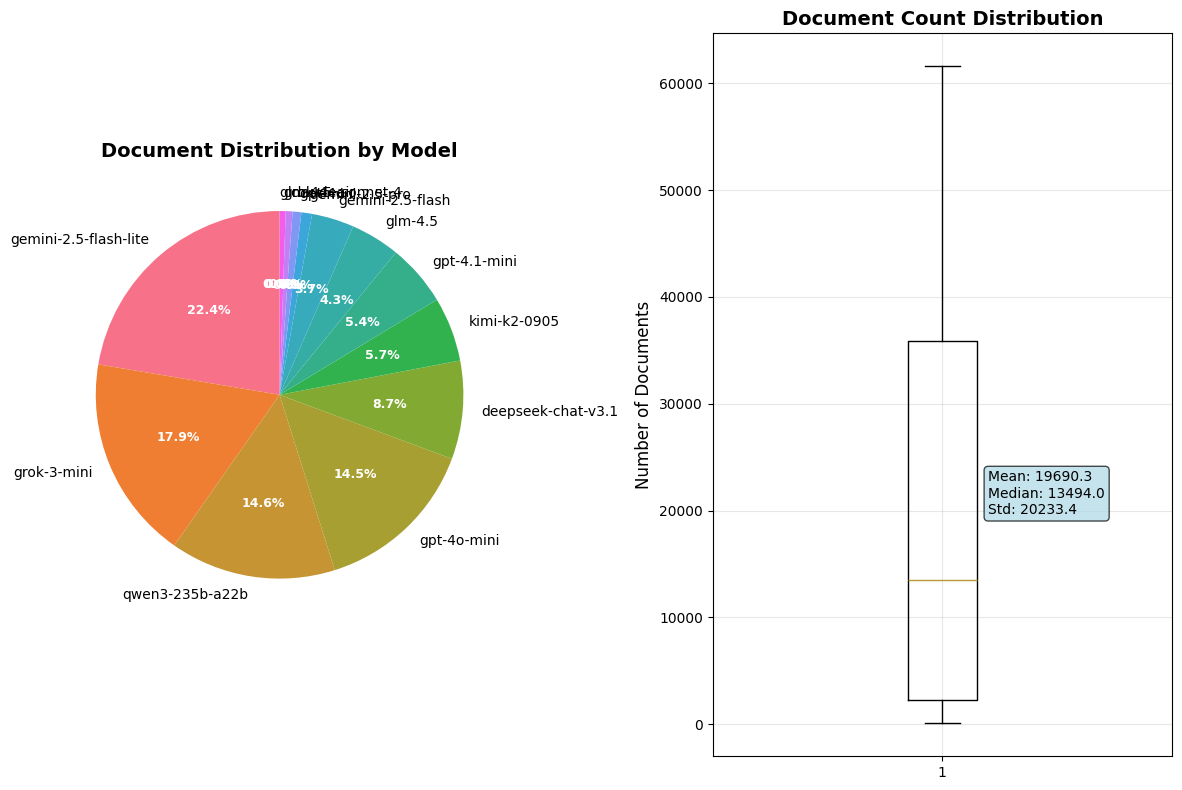

In [9]:
# Create visualization 2: Pie chart
plt.figure(figsize=(12, 8))

# Pie chart
plt.subplot(1, 2, 1)
colors = sns.color_palette("husl", len(df_models))
wedges, texts, autotexts = plt.pie(df_models['Document_Count'], 
                                  labels=df_models['Model'], 
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=90)

# Improve text readability
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

plt.title('Document Distribution by Model', fontsize=14, fontweight='bold')

# Box plot to show distribution
plt.subplot(1, 2, 2)
plt.boxplot(df_models['Document_Count'], vert=True)
plt.title('Document Count Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Documents', fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistics as text
stats_text = f"Mean: {df_models['Document_Count'].mean():.1f}\nMedian: {df_models['Document_Count'].median():.1f}\nStd: {df_models['Document_Count'].std():.1f}"
plt.text(1.1, df_models['Document_Count'].mean(), stats_text, fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

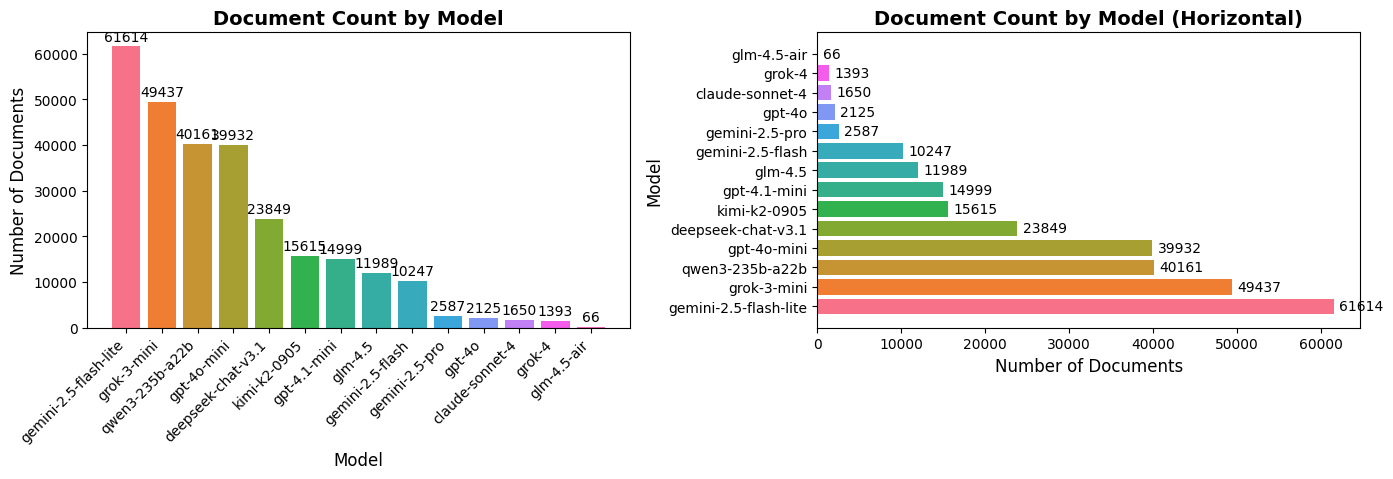

In [10]:
# Create visualization 1: Bar plot of document counts by model
plt.figure(figsize=(14, 8))

# Bar plot
plt.subplot(2, 2, 1)
bars = plt.bar(range(len(df_models)), df_models['Document_Count'], color=sns.color_palette("husl", len(df_models)))
plt.title('Document Count by Model', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)
plt.xticks(range(len(df_models)), df_models['Model'], rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(df_models['Document_Count']):
    plt.text(i, v + max(df_models['Document_Count']) * 0.01, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Horizontal bar plot for better readability
plt.subplot(2, 2, 2)
plt.barh(range(len(df_models)), df_models['Document_Count'], color=sns.color_palette("husl", len(df_models)))
plt.title('Document Count by Model (Horizontal)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Documents', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.yticks(range(len(df_models)), df_models['Model'])

# Add value labels
for i, v in enumerate(df_models['Document_Count']):
    plt.text(v + max(df_models['Document_Count']) * 0.01, i, str(v), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [11]:
# Convert to DataFrame for easier plotting
df_models = pd.DataFrame(list(model_counts.items()), columns=['Model', 'Document_Count'])
df_models = df_models.sort_values('Document_Count', ascending=False)

# Display the statistics
print("Document count statistics by model:")
print(df_models.to_string(index=False))
print(f"\nSummary statistics:")
print(f"Mean: {df_models['Document_Count'].mean():.1f}")
print(f"Median: {df_models['Document_Count'].median():.1f}")
print(f"Max: {df_models['Document_Count'].max()}")
print(f"Min: {df_models['Document_Count'].min()}")
print(f"Total documents: {df_models['Document_Count'].sum()}")

Document count statistics by model:
                Model  Document_Count
gemini-2.5-flash-lite           61614
          grok-3-mini           49437
      qwen3-235b-a22b           40161
          gpt-4o-mini           39932
   deepseek-chat-v3.1           23849
         kimi-k2-0905           15615
         gpt-4.1-mini           14999
              glm-4.5           11989
     gemini-2.5-flash           10247
       gemini-2.5-pro            2587
               gpt-4o            2125
      claude-sonnet-4            1650
               grok-4            1393
          glm-4.5-air              66

Summary statistics:
Mean: 19690.3
Median: 13494.0
Max: 61614
Min: 66
Total documents: 275664


In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import defaultdict

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Define the path to the results directory
results_dir = Path("/Users/zhzhou/Library/Mobile Documents/com~apple~CloudDocs/Desktop/桌面 - Zh的MacBook Pro/SafeContextualReward/results/contextual_reward_doc_debug_2")

print("Analyzing document generation frequency by model...")
print(f"Results directory: {results_dir}")

Analyzing document generation frequency by model...
Results directory: /Users/zhzhou/Library/Mobile Documents/com~apple~CloudDocs/Desktop/桌面 - Zh的MacBook Pro/SafeContextualReward/results/contextual_reward_doc_debug_2


In [13]:
# Count documents by model
model_counts = defaultdict(int)
model_word_counts = defaultdict(int)

# Get all model directories
model_dirs = [d for d in results_dir.iterdir() if d.is_dir()]
print(f"Found {len(model_dirs)} model directories:")

for model_dir in model_dirs:
    model_name = model_dir.name
    print(f"  - {model_name}")
    
    # Count total files for this model
    total_files = 0
    total_words = 0
    
    # Look in all subdirectories (word categories)
    for word_dir in model_dir.iterdir():
        if word_dir.is_dir():
            word_name = word_dir.name
            word_file_count = len([f for f in word_dir.iterdir() if f.suffix == '.txt'])
            total_files += word_file_count
            model_word_counts[f"{model_name}_{word_name}"] = word_file_count
    
    model_counts[model_name] = total_files
    print(f"    Total documents: {total_files}")

print(f"\nTotal models analyzed: {len(model_counts)}")

Found 14 model directories:
  - glm-4.5-air
    Total documents: 66
  - gemini-2.5-pro
    Total documents: 2587
  - gpt-4o
    Total documents: 2125
  - gpt-4.1-mini
    Total documents: 14999
  - gemini-2.5-flash-lite
    Total documents: 61614
  - qwen3-235b-a22b
    Total documents: 40161
  - deepseek-chat-v3.1
    Total documents: 23849
  - gemini-2.5-flash
    Total documents: 10247
  - grok-3-mini
    Total documents: 49437
  - glm-4.5
    Total documents: 11989
  - kimi-k2-0905
    Total documents: 15615
  - claude-sonnet-4
    Total documents: 1650
  - gpt-4o-mini
    Total documents: 39932
  - grok-4
    Total documents: 1393

Total models analyzed: 14
